# Práctica 5: Filtros Digitales

In [1]:
from Bode import bode

import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from csv import reader as reader_csv

# 1. Creación de la señal

### a) Señal fisiológica real

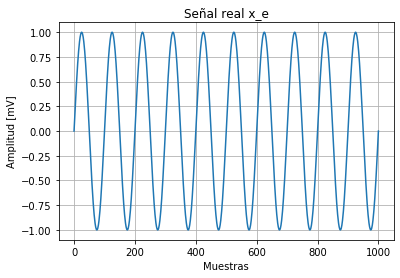

In [16]:
fo = 0.01 # Frecuencia fundamental
fs = 25 # Frecuencia de muestreo
n = np.arange(0,1001) # Vector de 1000 muestras
xe = np.sin(2*np.pi*fo*n)

plt.figure() 
plt.plot(n,xe)
plt.title('Señal real x_e')
plt.xlabel('Muestras')
plt.ylabel('Amplitud [mV]')
plt.grid();

### b) Señal fisiológica registrada (atenuada, desfasada y ruidosa)

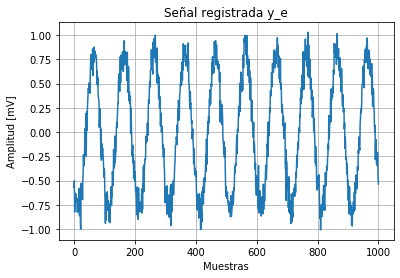

In [17]:
#Ruido Gausiano
mu, sigma = 0, 0.1 # media, desviación estándar
ruido = np.random.normal(mu, sigma, len(n))
atenuacion = 0.8
desfase = -15
ye = atenuacion*np.sin(2*np.pi*fo*n + desfase) + ruido

plt.figure()
plt.plot(n,ye)
plt.title('Señal registrada y_e')
plt.xlabel('Muestras')
plt.ylabel('Amplitud [mV]')
plt.grid();

### c) Comparación

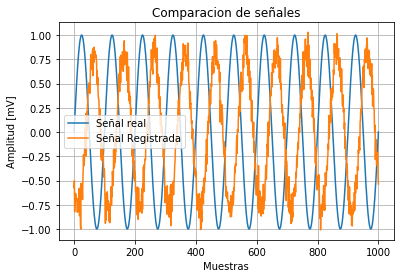

In [18]:
plt.figure()
plt.plot(n,xe)
plt.plot(n,ye)
plt.title('Comparacion de señales')
plt.xlabel('Muestras')
plt.ylabel('Amplitud [mV]')
plt.legend(['Señal real','Señal Registrada'])
plt.grid()

# 2. Diseño de Filtros

## a) Filtros FIR

signal.firwin(numtaps,cutoff,width,window,pass_zero,scale,fnyq,fs)

In [5]:
fnyq = fs/2 # Frecuencia de Nyquist

### Pasa Bajas

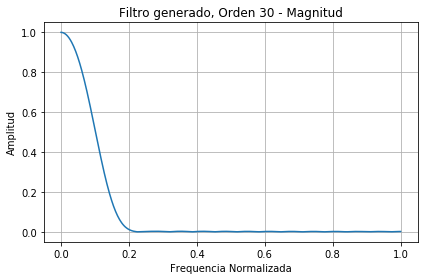

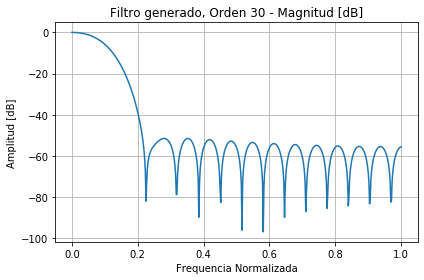

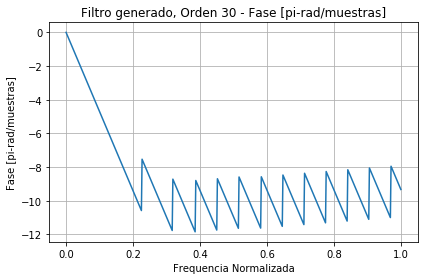

In [6]:
# Pasa Bajas FIR
orden = 30
fc = 1.25 # Hz
fc_normalizada = fc/fnyq

# Coeficientes
a = 1
b = signal.firwin(orden+1,fc_normalizada,window='hamming',pass_zero='lowpass')
pasa_bajas_fir = [a,b]

# Diagrama de Bode del filtro diseñado
bode(b,a,orden)

### Pasa Altas

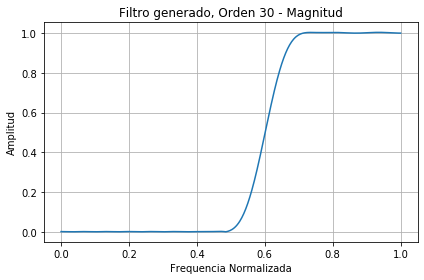

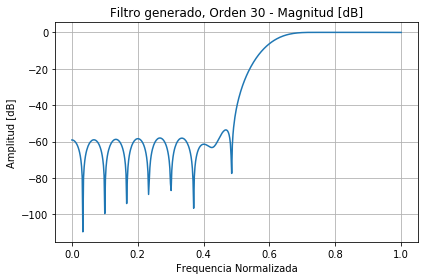

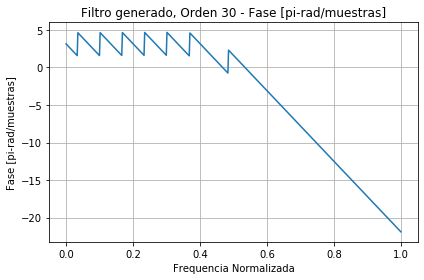

In [7]:
# Pasa Altas FIR
# Cambios: Debe procurarse que si la banda de paso contiene la Fnyq, el orden
# del filtro debe ser par, además pass_zero debe ser 'highpass'
orden = 30
fc = 7.5 # Hz
fc_normalizada = fc/fnyq

if (orden%2 != 0): orden = orden + 1;
# Coeficientes
a = 1
b = signal.firwin(orden+1,fc_normalizada,window='hamming',pass_zero='highpass')

# Diagrama de Bode del filtro diseñado
bode(b,a,orden)

### Pasa Banda

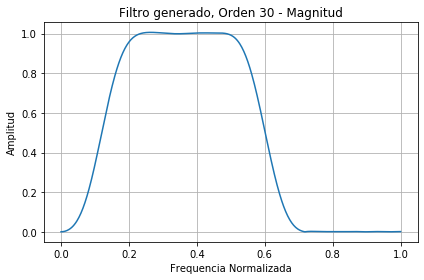

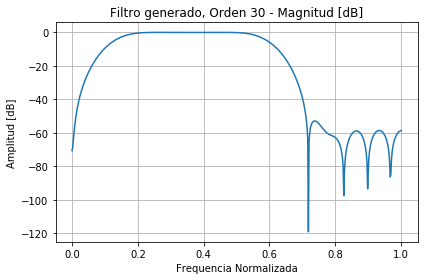

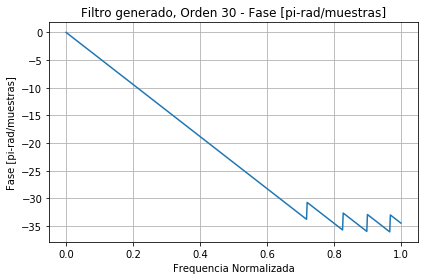

In [8]:
# Pasa Banda FIR
# Cambios: En lugar de una frecuencia de corte, se ingresa una tupla que 
# contenga la frecuencia baja y la alta, además pass_zero debe ser 'bandpass'
orden = 30
f_baja = 1.5 # Hz
f_baja = f_baja/fnyq
f_alta = 7.5
f_alta = f_alta/fnyq

# Coeficientes
a = 1
b = signal.firwin(orden+1,[f_baja,f_alta],window='hamming',pass_zero='bandpass')

# Diagrama de Bode del filtro diseñado
bode(b,a,orden)

## b) Filtros IIR

signal.iirfilter(N, Wn, rp=None, rs=None, btype='band', analog=False, ftype='butter', output='ba', fs=None)

In [9]:
fnyq = fs/2

### Pasa Bajas

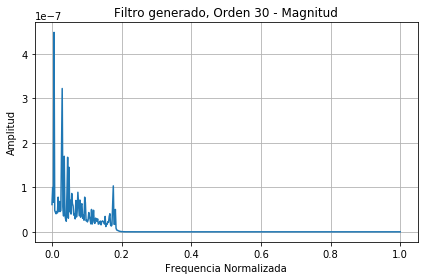

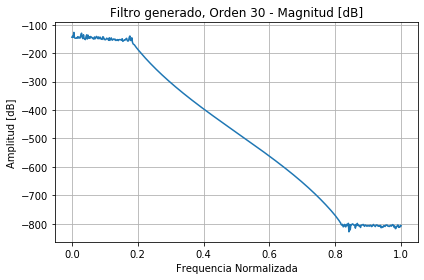

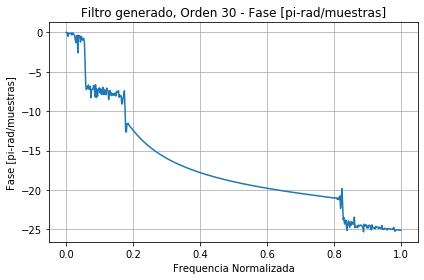

In [10]:
# Pasa Bajas IIR
orden = 30
fc = 1.25 # Hz
fc_normalizada = fc/fnyq

# Coeficientes
b,a = signal.iirfilter(orden,fc_normalizada,btype='lowpass',output='ba')
pasa_bajas_iir = [a,b]

# Diagrama de Bode del filtro diseñado
bode(b,a,orden)

### Pasa Altas

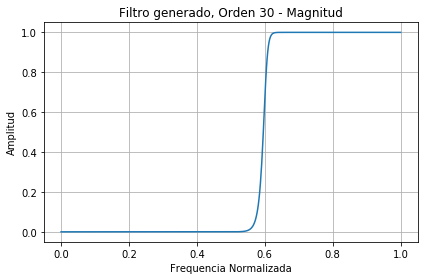

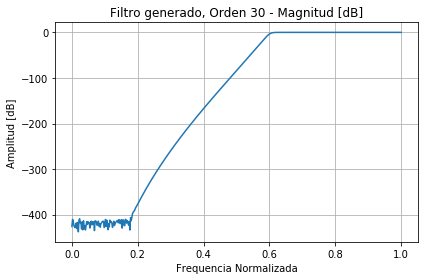

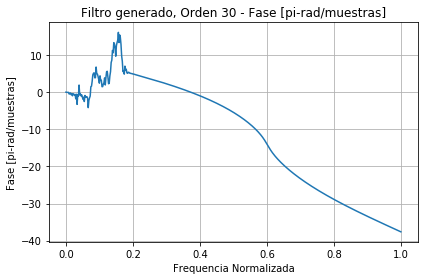

In [11]:
# Pasa Altas IIR
# Cambios: Debe procurarse que si la banda de paso contiene la Fnyq, el orden
# del filtro debe ser par, además pass_zero debe ser 'highpass'
orden = 30
fc = 7.5 # Hz
fc_normalizada = fc/fnyq

# Coeficientes
b,a = signal.iirfilter(orden,fc_normalizada,btype='highpass',output='ba')

# Diagrama de Bode del filtro diseñado
bode(b,a,orden)

### Pasa Banda

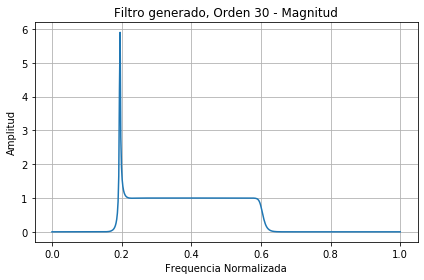

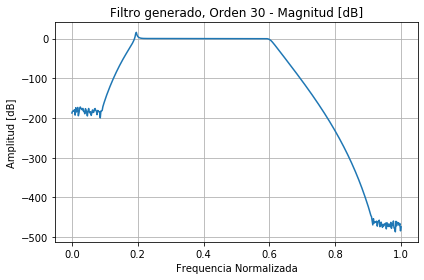

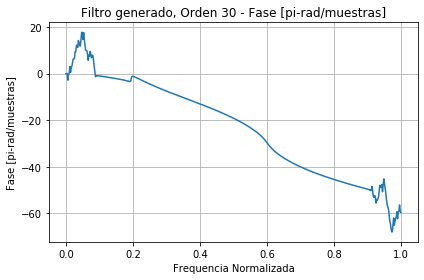

In [12]:
# Pasa Banda IIR
# Cambios: En lugar de una frecuencia de corte, se ingresa una tupla que 
# contenga la frecuencia baja y la alta, además pass_zero debe ser 'bandpass'
orden = 30
f_baja = 1.25 # Hz
f_baja = f_baja/fnyq
f_alta = 7.5
f_alta = f_alta/fnyq

# Coeficientes
b,a = signal.iirfilter(orden,[f_baja,f_alta],btype='bandpass',output='ba')

# Diagrama de Bode del filtro diseñado
bode(b,a,orden)

### Comparación

Pasa Bajas: El filtro FIR funcionó bien, sin embargo, el filtro IIR atenúo 
y distorsiono la banda pasante debido al orden del filtro tan elevado

Pasa Altas: Ambos filtros presentan el comportamiento deseado, sin embargo
la pendiente del filtro IIR es mas brusca

Pasa Banda: Ambos filtros son adecuados, sin embargo el IIR tiene una escala
de atenuación en la banda de rechazo muchisimo mayor

# 3. Filtrado

### Pasa Bajas FIR

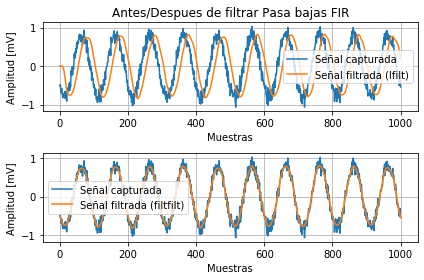

In [13]:
# Pasa bajas FIR
plt.figure()
plt.subplot(2,1,1)

# Rutina lfilter
ye_pasa_bajas_fir = signal.lfilter(pasa_bajas_fir[1],pasa_bajas_fir[0],ye)
plt.plot(n,ye)
plt.plot(n,ye_pasa_bajas_fir)
plt.title('Antes/Despues de filtrar Pasa bajas FIR')
plt.xlabel('Muestras')
plt.ylabel('Amplitud [mV]')
plt.legend(['Señal capturada','Señal filtrada (lfilt)'])
plt.grid()

# Rutina filtfilt
plt.subplot(2,1,2)
ye_pasa_bajas_fir = signal.filtfilt(pasa_bajas_fir[1],pasa_bajas_fir[0],ye)
plt.plot(n,ye)
plt.plot(n,ye_pasa_bajas_fir)
plt.xlabel('Muestras')
plt.ylabel('Amplitud [mV]')
plt.legend(['Señal capturada','Señal filtrada (filtfilt)'])
plt.grid()

plt.tight_layout()

 ¿Por qué se utiliza sólo el numerador? ¿A qué hace referencia el numerador? 
 ¿Evidencia cambios en el uso de las funciones de filtrado? ¿Cómo se puede 
explicar la falta de coincidencia? ¿Es adecuado el orden del filtro usado? 

 En este caso se emplea solo el numerador dado que los coeficientes del 
 denominador son a = 1, EL NUMERADOR HACE REFERENCIA A.....
 Al usar la rutina lfilter, la señal resultante presenta el desfase correspondiente
 al inducido por el filtro, mientras que en la rutina filtfilt, este desfase 
 se neutraliza.
 Respeto al orden del filtro, puede considerarse adecuado ya que atenuo 
 de forma eficaz el ruido de la señal capturada


### Pasa Bajas IIR

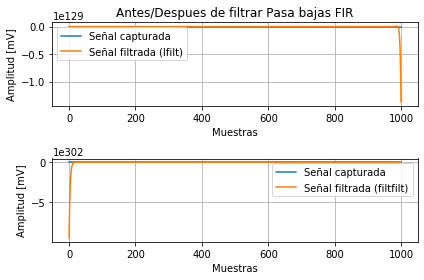

In [38]:
# Pasa bajas IIR
plt.figure()
plt.subplot(2,1,1)

# Rutina lfilter
ye_pasa_bajas_iir = signal.lfilter(pasa_bajas_iir[1],pasa_bajas_iir[0],ye)
plt.plot(n,ye)
plt.plot(n,ye_pasa_bajas_iir)
plt.title('Antes/Despues de filtrar Pasa bajas FIR')
plt.xlabel('Muestras')
plt.ylabel('Amplitud [mV]')
plt.legend(['Señal capturada','Señal filtrada (lfilt)'])
plt.grid()

# Rutina filtfilt
plt.subplot(2,1,2)
ye_pasa_bajas_iir = signal.filtfilt(pasa_bajas_iir[1],pasa_bajas_iir[0],ye)
plt.plot(n,ye)
plt.plot(n,ye_pasa_bajas_iir)
plt.xlabel('Muestras')
plt.ylabel('Amplitud [mV]')
plt.legend(['Señal capturada','Señal filtrada (filtfilt)'])
plt.grid()

plt.tight_layout()

¿Por qué se utiliza el numerador y denominador? ¿Es necesario cambiar el orden
 del filtro? En tal caso hágalo y analice.

 -La funcion de transferencia de los filtros IIR esta conformada por polos y
 ceros, por lo que se requiere de numerador y denominador para expresarla.
 
 Sí es necesario, dado que con un orden 30, la señal se elimina por completo
 en la banda pasante

### Rediseño Filtro IIR

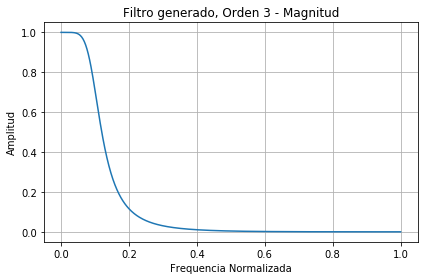

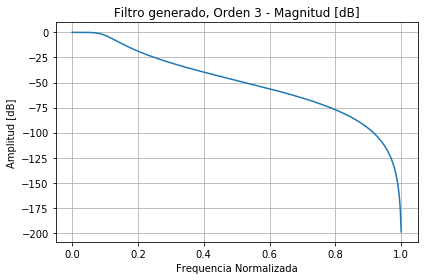

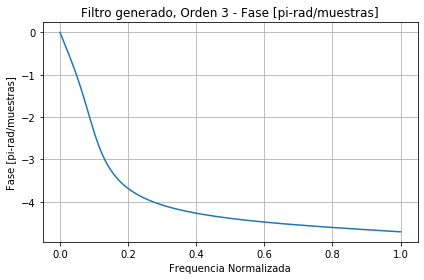

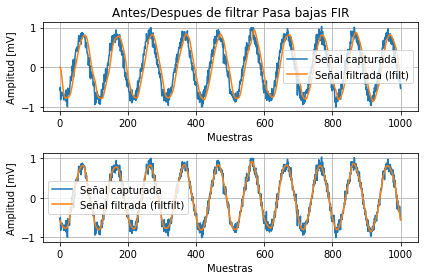

In [39]:
# Pasa Bajas IIR
orden = 3
fc = 1.25 # Hz
fc_normalizada = fc/fnyq

# Coeficientes
b,a = signal.iirfilter(orden,fc_normalizada,btype='lowpass',output='ba')
pasa_bajas_iir = [a,b]

# Diagrama de Bode del filtro diseñado
bode(b,a,orden)

plt.figure()
plt.subplot(2,1,1)

ye_pasa_bajas_iir = signal.lfilter(pasa_bajas_iir[1],pasa_bajas_iir[0],ye)
plt.plot(n,ye)
plt.plot(n,ye_pasa_bajas_iir)
plt.title('Antes/Despues de filtrar Pasa bajas FIR')
plt.xlabel('Muestras')
plt.ylabel('Amplitud [mV]')
plt.legend(['Señal capturada','Señal filtrada (lfilt)'])
plt.grid()

plt.subplot(2,1,2)
ye_pasa_bajas_iir = signal.filtfilt(pasa_bajas_iir[1],pasa_bajas_iir[0],ye)
plt.plot(n,ye)
plt.plot(n,ye_pasa_bajas_iir)
plt.xlabel('Muestras')
plt.ylabel('Amplitud [mV]')
plt.legend(['Señal capturada','Señal filtrada (filtfilt)'])
plt.grid()

plt.tight_layout()

# El filtro pasa bajas IIR de orden 3, logró el mismo resultado que el pasa
# bajas FIR de orden 30